### DSCI 510 Fall 2021 Final Project Submission

1.	**The name of student**:

    Yerkebulan Bauyrzhanov

2. **About the project (Motivation):**

    I am a fan of soccer. Therefore, I decided to choose this topic as my fist data analysis project.
    Analysis I would like to do with the combined data is to find:
    
    1)	What affects the transfer cost of a soccer player? For example, does the number of goals affect the transfer cost of a soccer player?
    
    2)	Do players with a high market value influence the results of the match?

3. **Datasources:**

**Source 1** = https://www.transfermarkt.us/ - one of the biggest soccer databases and communities in the world. 
We will get information about the most valuable players by web-scrapping.

**Source 2** = https://api.football-data.org - External public API, provides football data and statistics 
(live scores, fixtures, tables, squads, lineups/subs, etc.) in a machine-readable way.
We will get information about players, their results of the matches by API requests.

**Source 3** = https://www.theguardian.com/football - the part of news-portal about soccer with current standings of soccer clubs. 
We will get information about soccer clubs in 5 top European soccer leagues by web-scrapping.

4. **Information about API keys for Source 2:**

We have to register to receive an API key by email. The free API key has limitations. 
We will be available to send no more than 10 requests in a minute.

5. **How to run the code**

We can get the clean data used in this notebook analysis simply from the data subfolder where the data sets have existed already, or you can run the data_collector.py file to get the data sets from the Internet.

To do so, using command-line: python .\src\data_collector.py, then datasets will be stored in the data subfolder.

Be ready that it takes more than 25 minutes to scrape datasets from sources (especially source2) due to the API source having a limitation of 10 calls/minute.

This project requires the following packages:

pandas, numpy, seaborn, requests, and beautifulsoup To run this project, make sure the above packages are installed, and then simply clone the repo at https://github.com/bauyrzha/DSCI510-finalproject and execute this notebook.

If it cannot successfully run, check the requirements.txt.

We can also collect data from sources separately by running Scrapping_source_1.py, Api_request_source_2.py, and Scrapping_source_3.py. 

# Analysis performed for combained data sources 1 and 2

1) Before analyzing let's find out what variables we have.

**name** - name of players.

**position** - position of players on the soccer pitch.

**Age** - age of players.

**Nat.** - nationality of players.

**Market value** - the cost of players in the transfer market.

**club** - the name of clubs where players are playing.

**Goals** - the number of goals of players in the current season (2021-2022).

**Assists** - the number of assists of players in the current season (2021-2022).

**win** - the number of wins in the current season (2021-2022).

**draw** - the number of draws in the current season (2021-2022).

**lost** - the number of losses in the current season (2021-2022).

6. **Сreate new variables that will be needed for analysis.**

Below the following variables will be created:

**player_avg_points** - the average earned points of players in one match in the current season (2021-2022).

**continent** - we divided players into two categories: players who are from European countries and who are from other (non-Europe countries)


In [1]:
#import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Read in the data sets
df = pd.read_csv('../data/df_source1+source2.csv')
df3 = pd.read_csv('../data/df_source3.csv')

In [3]:
# get unique nationalities of players
df['Nat.'].unique()

array(['England', 'France', 'Italy', 'Nigeria', 'Brazil', 'Belgium',
       'Spain', 'Denmark', 'Scotland', 'Portugal', 'Cameroon', 'Germany',
       'Netherlands', 'Albania', 'United States', 'Austria', 'Argentina',
       'Japan', 'Sweden', 'Switzerland', 'Hungary', 'Colombia',
       'Burkina Faso', 'Senegal', 'Norway', "Cote d'Ivoire", 'Morocco',
       'Mexico', 'Guinea', 'Poland', 'Uruguay', 'Turkey', 'Egypt',
       'The Gambia', 'Czech Republic', 'Gabon', 'Algeria', 'Ukraine',
       'Serbia', 'Ghana'], dtype=object)

In [4]:
# I want to add a new variable 'continent' which we divided players into two categories: 
# players who are from European countries and who are from other (non-Europe countries)
nat_list = ['England', 'France', 'Italy', 'Belgium', 'Spain', 'Denmark', 'Scotland', 'Portugal','Germany', 'Netherlands', 'Albania', 'Austria', 'Sweden', 'Switzerland', 'Hungary', 'Norway', 'Turkey', 'Czech Republic', 'Ukraine', 'Serbia']
df['continent'] = np.where(df['Nat.'].isin(nat_list), 'Europe', 'other')

In [5]:
#add a new column player_points (average points in one match)
df['player_avg_points'] = (df['win']*3 + df['draw'])/(df['win'] + df['draw'] + df['lost'])

In [6]:
# check our DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               202 non-null    object 
 1   position           202 non-null    object 
 2   Age                202 non-null    int64  
 3   Nat.               202 non-null    object 
 4   Market value       202 non-null    object 
 5   club               202 non-null    object 
 6   Goals              202 non-null    int64  
 7   Assists            202 non-null    int64  
 8   id                 202 non-null    int64  
 9   win                202 non-null    int64  
 10  draw               202 non-null    int64  
 11  lost               202 non-null    int64  
 12  continent          202 non-null    object 
 13  player_avg_points  197 non-null    float64
dtypes: float64(1), int64(7), object(6)
memory usage: 22.2+ KB


7. **Data cleaning**

We will

- delete extra characters

- change type of variables

- delete NaN rows in continuous variables 

- delete the column 'id'

In [7]:
# replace a character from column to apply to numeric
df['Market value'] = df['Market value'].str.replace('m','')
df['Market value'] = df['Market value'].str.replace('£','')

In [8]:
df.head()

,name,position,Age,Nat.,Market value,club,Goals,Assists,id,win,draw,lost,continent,player_avg_points
0,Aaron Ramsdale,Goalkeeper,23,England,18.00,Arsenal FC,0,0,5530,4,3,6,Europe,1.153846
1,Abdoulaye Doucouré,Central Midfield,28,France,22.50,Everton FC,2,4,8119,3,2,3,Europe,1.375000
2,Adam Armstrong,Centre-Forward,24,England,16.20,Southampton FC,2,3,4863,2,5,5,Europe,0.916667
3,Adrien Rabiot,Central Midfield,26,France,27.00,Juventus FC,0,1,3368,3,1,8,Europe,0.833333
4,Alessio Romagnoli,Centre-Back,26,Italy,18.00,AC Milan,1,0,1740,5,2,9,Europe,1.062500


In [9]:
# change type of the column
df['Market value'] = df['Market value'].astype('float') 

In [10]:
# check our DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               202 non-null    object 
 1   position           202 non-null    object 
 2   Age                202 non-null    int64  
 3   Nat.               202 non-null    object 
 4   Market value       202 non-null    float64
 5   club               202 non-null    object 
 6   Goals              202 non-null    int64  
 7   Assists            202 non-null    int64  
 8   id                 202 non-null    int64  
 9   win                202 non-null    int64  
 10  draw               202 non-null    int64  
 11  lost               202 non-null    int64  
 12  continent          202 non-null    object 
 13  player_avg_points  197 non-null    float64
dtypes: float64(2), int64(7), object(5)
memory usage: 22.2+ KB


In [11]:
# delete error data in our dataFrame
df = df.dropna()

In [12]:
# check our DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 201
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               197 non-null    object 
 1   position           197 non-null    object 
 2   Age                197 non-null    int64  
 3   Nat.               197 non-null    object 
 4   Market value       197 non-null    float64
 5   club               197 non-null    object 
 6   Goals              197 non-null    int64  
 7   Assists            197 non-null    int64  
 8   id                 197 non-null    int64  
 9   win                197 non-null    int64  
 10  draw               197 non-null    int64  
 11  lost               197 non-null    int64  
 12  continent          197 non-null    object 
 13  player_avg_points  197 non-null    float64
dtypes: float64(2), int64(7), object(5)
memory usage: 23.1+ KB


In [13]:
#delete the column 'id'
df = df.drop('id', axis = 1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 0 to 201
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               197 non-null    object 
 1   position           197 non-null    object 
 2   Age                197 non-null    int64  
 3   Nat.               197 non-null    object 
 4   Market value       197 non-null    float64
 5   club               197 non-null    object 
 6   Goals              197 non-null    int64  
 7   Assists            197 non-null    int64  
 8   win                197 non-null    int64  
 9   draw               197 non-null    int64  
 10  lost               197 non-null    int64  
 11  continent          197 non-null    object 
 12  player_avg_points  197 non-null    float64
dtypes: float64(2), int64(6), object(5)
memory usage: 21.5+ KB


# Data visualization

We use visualization to "grab" some hypotheses (predictions) on our data.

In our particular case, we want to establish the following: 

1) the distribution of the target variable - the market value (cost); 

2) presence of correlation between variables. 

8. **Figure out the distribution of the target variable**

Text(0.5, 1.0, 'Market value')

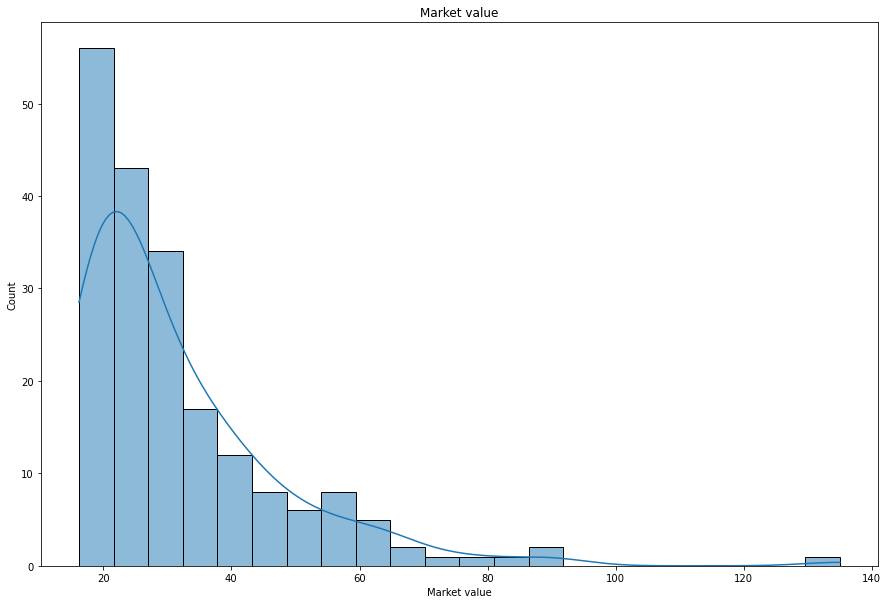

In [15]:
#Trying to figure out the distribution of the market value (cost);
fig, ax = plt.subplots(figsize=(15, 10))

# the line is the density of the distribution

sns.histplot(df['Market value'], kde=True) 
plt.title('Market value')

We see that there is no normal distribution because, in the intervals 15 - 30 and 55 - 60, we see the rise of the lines. This should not be the case with the normal distribution. This means that we observe costs in these intervals more often than the normal distribution predicts. 

9. **Figure out correlation between variables**

a) Market value, age and continent

<AxesSubplot:xlabel='Age', ylabel='Market value'>

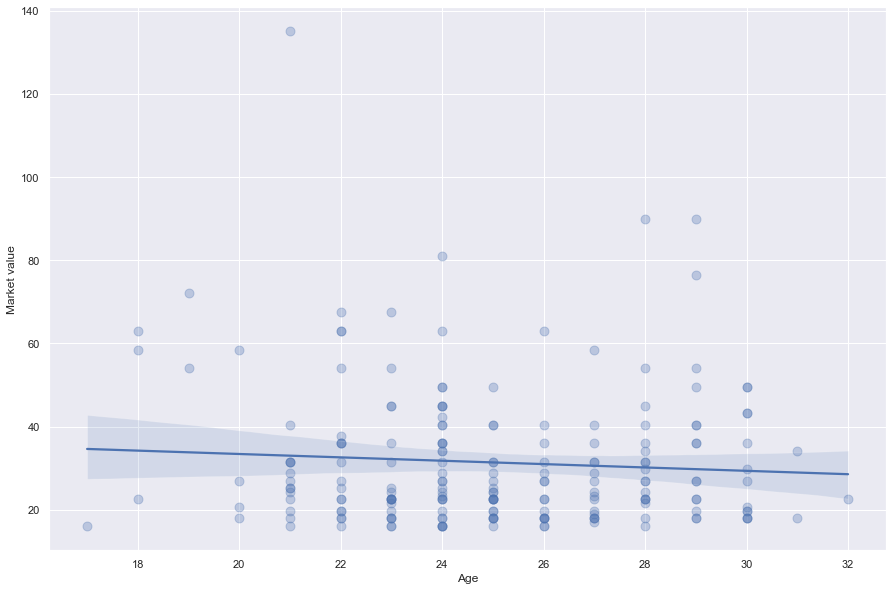

In [16]:
# Set the style of the graph
sns.set_theme(color_codes=True)

# set the size of the graph
fig, ax = plt.subplots(figsize=(15, 10)) 

#Trying to figure out whether the market value correlates the Ages
sns.regplot(x='Age', y='Market value', data = df, scatter_kws={'s':80, 'alpha': 0.3}) 

In [17]:
# Get the R squared value
df['Market value'].corr(df['Age'])

-0.07403426852072618

We can conclude that the Market value and age of players have a slight negative relationship.
R squared value is close to zero, which can be considered no relationship.

Text(0.5, 1.0, 'linear regression with the third variable')

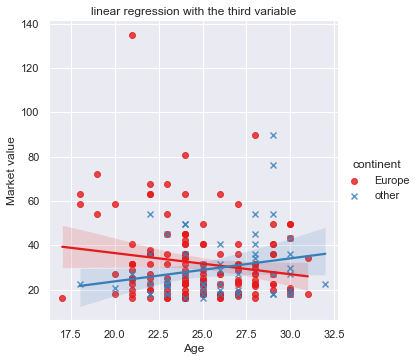

In [18]:
# linear regression with the third variable, which is given by color
# In our case, we use 'continent' as the third variable.

sns.lmplot(x='Age', y='Market value', hue="continent", data=df, markers=["o", "x"], palette="Set1")
plt.title('linear regression with the third variable')

In this plot, we can consider that players from Europe lose the market value with age whereas players from non-European countries become more expensive. 

b) Market value, Goals and continent

<AxesSubplot:xlabel='Goals', ylabel='Market value'>

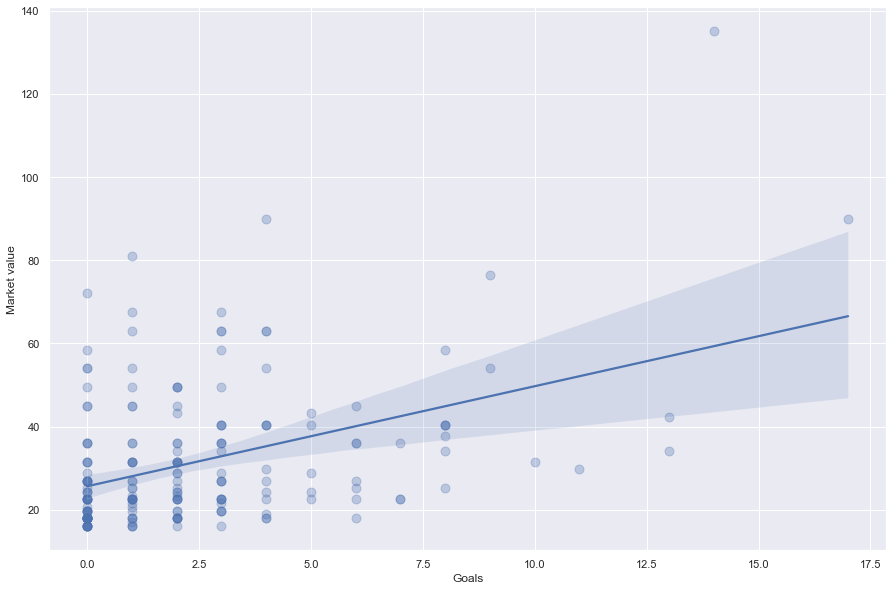

In [19]:
# Set the style of the graph
sns.set_theme(color_codes=True)

# set the size of the graph
fig, ax = plt.subplots(figsize=(15, 10)) 

#Trying to figure out whether the market value correlates the Goals
sns.regplot(x='Goals', y='Market value', data = df, scatter_kws={'s':80, 'alpha': 0.3}) 

In [20]:
# Get the R squared value
df['Market value'].corr(df['Goals'])

0.42291961406517575

We can conclude that the Market value and the number of goals of players have a enough strong relationship. That is, it means the more goals players score, the higher their market value is. 

Text(0.5, 1.0, 'linear regression with the third variable')

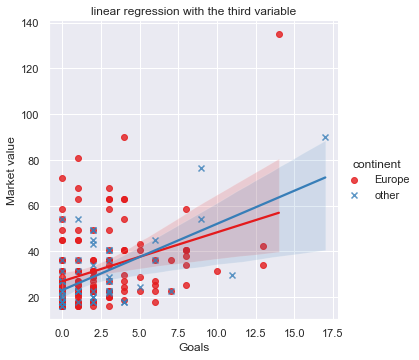

In [21]:
# linear regression with the third variable, which is given by color
# In our case, we use 'continent' as the third variable.

sns.lmplot(x='Goals', y='Market value', hue="continent", data=df, markers=["o", "x"], palette="Set1")
plt.title('linear regression with the third variable')

c) Market value, Assists and continent

<AxesSubplot:xlabel='Assists', ylabel='Market value'>

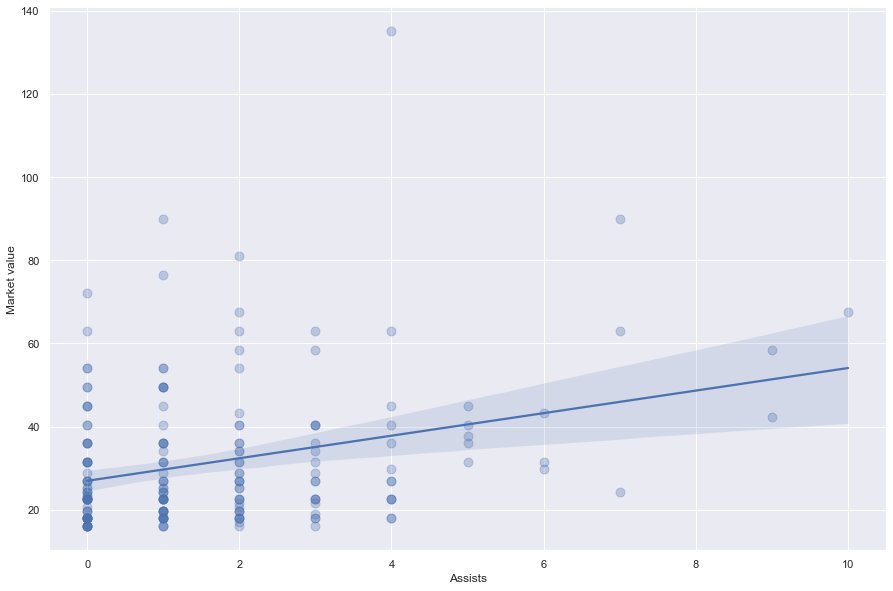

In [22]:
# Set the style of the graph
sns.set_theme(color_codes=True)

# set the size of the graph
fig, ax = plt.subplots(figsize=(15, 10)) 

#Trying to figure out whether the market value correlates the Assists
sns.regplot(x='Assists', y='Market value', data = df, scatter_kws={'s':80, 'alpha': 0.3}) 

In [23]:
# Get the R squared value
df['Market value'].corr(df['Assists'])

0.30578884210208673

We can conclude that the Market value and the number of assists of players have a relationship, but not stronger than goals. That is, it means the more assists players do, the higher their market value is. 

Text(0.5, 1.0, 'linear regression with the third variable')

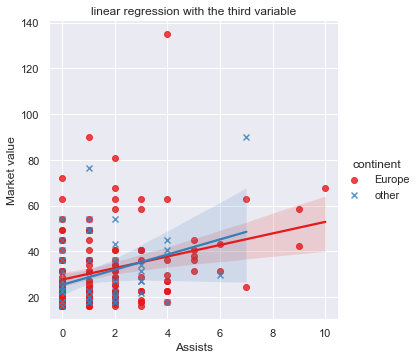

In [24]:
# linear regression with the third variable, which is given by color
# In our case, we use 'continent' as the third variable.

sns.lmplot(x='Assists', y='Market value', hue="continent", data=df, markers=["o", "x"], palette="Set1")
plt.title('linear regression with the third variable')

d) Market value, player_avg_points and continent

<AxesSubplot:xlabel='player_avg_points', ylabel='Market value'>

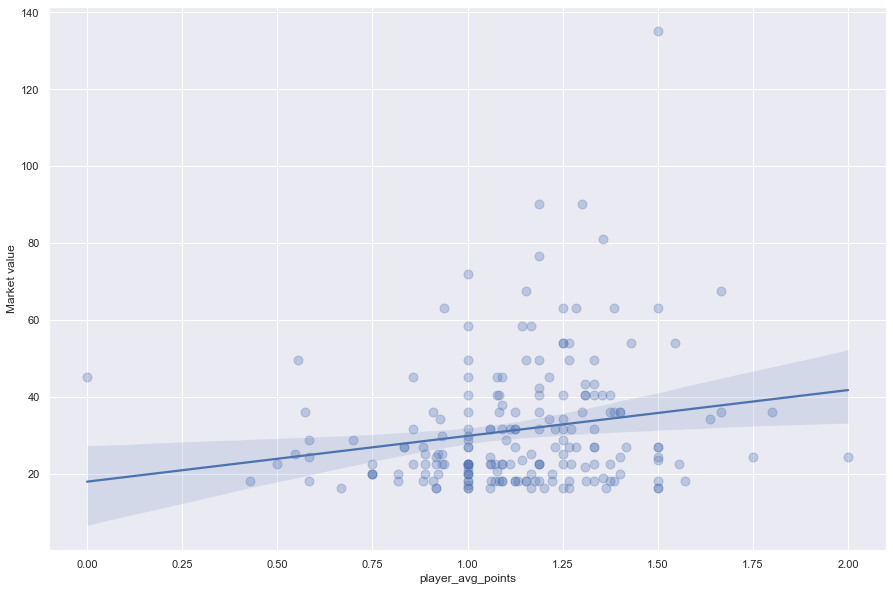

In [25]:
# Set the style of the graph
sns.set_theme(color_codes=True)

# set the size of the graph
fig, ax = plt.subplots(figsize=(15, 10)) 

#Trying to figure out whether the market value correlates the player_points
sns.regplot(x='player_avg_points', y='Market value', data = df, scatter_kws={'s':80, 'alpha': 0.3}) 

In [26]:
# Get the R squared value
df['Market value'].corr(df['player_avg_points'])

0.18677070382134778

We can conclude that the Market value and player_points have a slight positive relationship. That is, it means The more points players earn, the higher their price is.

Text(0.5, 1.0, 'linear regression with the third variable')

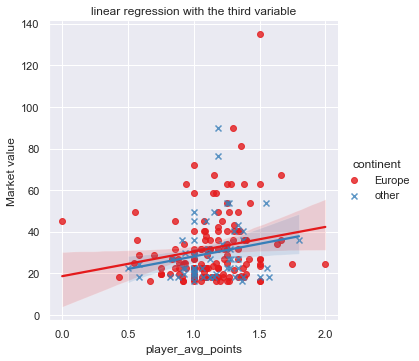

In [27]:
# linear regression with the third variable, which is given by color
# In our case, we use 'continent' as the third variable.

sns.lmplot(x='player_avg_points', y='Market value', hue="continent", data=df, markers=["o", "x"], palette="Set1")
plt.title('linear regression with the third variable')

# The number of goals, the number of assists, and points players earn affect the transfer cost of a soccer player.

# Analysis performed for combained data sources 1, 2 and 3
 
1) Before analyzing let's find out what variables we have.

**club** - the name of clubs where players are playing.

**Age** - the average age of players grouped by the club.

**Market value** - the average cost of players grouped by the club in the transfer market.

**Goals** - the average number of goals of players grouped by the club in the current season (2021-2022).

**Assists** - the average number of assists of players grouped by the club in the current season (2021-2022).

**win** - the average number of wins of players grouped by the club in the current season (2021-2022).

**draw** - the average number of draws of players grouped by the club in the current season (2021-2022).

**lost** - the average  number of losses of players grouped by the club in the current season (2021-2022).

**club_avg_points** - the average earned points of clubs in one match in the current season (2021-2022). 

In [28]:
# Read in the data set (data source 3)
df3 = pd.read_csv('../data/df_source3.csv')

In [29]:
# delete extra character for matching with source 3
extra_characters = [' FC','FC ', ' BC', 'AC ', ' CF', 'AC ', 'AS ', 'SS ', 'SSC ', 'ACF ']
for ch in extra_characters:
    df['club'] = df['club'].str.replace(ch, '')

In [30]:
# Get the average of all continuous variables for each club
df2 = df.groupby(df['club']).mean()

In [31]:
# reset index
df2 = df2.reset_index()

In [32]:
#check our dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   club               34 non-null     object 
 1   Age                34 non-null     float64
 2   Market value       34 non-null     float64
 3   Goals              34 non-null     float64
 4   Assists            34 non-null     float64
 5   win                34 non-null     float64
 6   draw               34 non-null     float64
 7   lost               34 non-null     float64
 8   player_avg_points  34 non-null     float64
dtypes: float64(8), object(1)
memory usage: 2.5+ KB


In [33]:
# get list of clubs
club_list = df2["club"].to_list()
print(club_list)

['Arsenal', 'Atalanta', 'Barcelona', 'Bayer 04 Leverkusen', 'Bologna 1909', 'Borussia Dortmund', 'Borussia Mönchengladbach', 'Brentford', 'Burnley', 'Cagliari Calcio', 'Chelsea', 'Eintracht Frankfurt', 'Everton', 'Fiorentina', 'Getafe', 'Juventus', 'Lazio', 'Liverpool', 'Milan', 'Napoli', 'OGC Nice', 'RB Leipzig', 'Real Betis Balompié', 'Roma', 'Sevilla', 'Southampton', 'TSG 1899 Hoffenheim', 'Torino', 'UC Sampdoria', 'Valencia', 'VfB Stuttgart', 'VfL Wolfsburg', 'Villarreal', 'Watford']


In [34]:
# we leave the clubs which matched
df3 = df3[df3['club'].isin(club_list)]

In [35]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 0 to 76
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   club             22 non-null     object 
 1   GP               22 non-null     int64  
 2   W                22 non-null     int64  
 3   D                22 non-null     int64  
 4   L                22 non-null     int64  
 5   F                22 non-null     int64  
 6   A                22 non-null     int64  
 7   GD               22 non-null     int64  
 8   Pts              22 non-null     int64  
 9   club_avg_points  22 non-null     float64
dtypes: float64(1), int64(8), object(1)
memory usage: 1.9+ KB


In [36]:
# we have 22 clubs, for simple analysis it is enough.
# get list of clubs
club_list = df3["club"].to_list()
print(club_list)

['Chelsea', 'Liverpool', 'Arsenal', 'Brentford', 'Everton', 'Southampton', 'Watford', 'Burnley', 'RB Leipzig', 'Eintracht Frankfurt', 'Napoli', 'Atalanta', 'Roma', 'Fiorentina', 'Juventus', 'Lazio', 'Torino', 'Sevilla', 'Barcelona', 'Valencia', 'Villarreal', 'Getafe']


In [37]:
# we leave the clubs which matched
df2 = df2[df2['club'].isin(club_list)]

In [38]:
#check our dataFrame
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 0 to 33
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   club               22 non-null     object 
 1   Age                22 non-null     float64
 2   Market value       22 non-null     float64
 3   Goals              22 non-null     float64
 4   Assists            22 non-null     float64
 5   win                22 non-null     float64
 6   draw               22 non-null     float64
 7   lost               22 non-null     float64
 8   player_avg_points  22 non-null     float64
dtypes: float64(8), object(1)
memory usage: 1.7+ KB


In [39]:
# we sort by name of clubs in data source 3
df3 = df3.sort_values(by=['club'])

In [40]:
#check our dataFrame
df3

,club,GP,W,D,L,F,A,GD,Pts,club_avg_points
4,Arsenal,13,7,2,4,15,17,-2,23,1.769231
41,Atalanta,14,8,4,2,28,17,11,28,2.000000
64,Barcelona,14,6,5,3,23,16,7,23,1.642857
11,Brentford,13,4,4,5,17,17,0,16,1.230769
17,Burnley,12,1,6,5,14,20,-6,9,0.750000
0,Chelsea,13,9,3,1,31,5,26,30,2.307692
31,Eintracht Frankfurt,13,4,6,3,16,17,-1,18,1.384615
13,Everton,13,4,3,6,16,20,-4,15,1.153846
43,Fiorentina,14,7,0,7,21,19,2,21,1.500000
76,Getafe,15,2,4,9,10,19,-9,10,0.666667


In [41]:
# we add the "club_avg_points" column from source2 into source1
df2['club_avg_points'] = df3['club_avg_points'].values

In [42]:
#check our dataframe
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 0 to 33
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   club               22 non-null     object 
 1   Age                22 non-null     float64
 2   Market value       22 non-null     float64
 3   Goals              22 non-null     float64
 4   Assists            22 non-null     float64
 5   win                22 non-null     float64
 6   draw               22 non-null     float64
 7   lost               22 non-null     float64
 8   player_avg_points  22 non-null     float64
 9   club_avg_points    22 non-null     float64
dtypes: float64(9), object(1)
memory usage: 1.9+ KB


10. **Figure out correlation between between market value and club_avg_points**

<AxesSubplot:xlabel='Market value', ylabel='club_avg_points'>

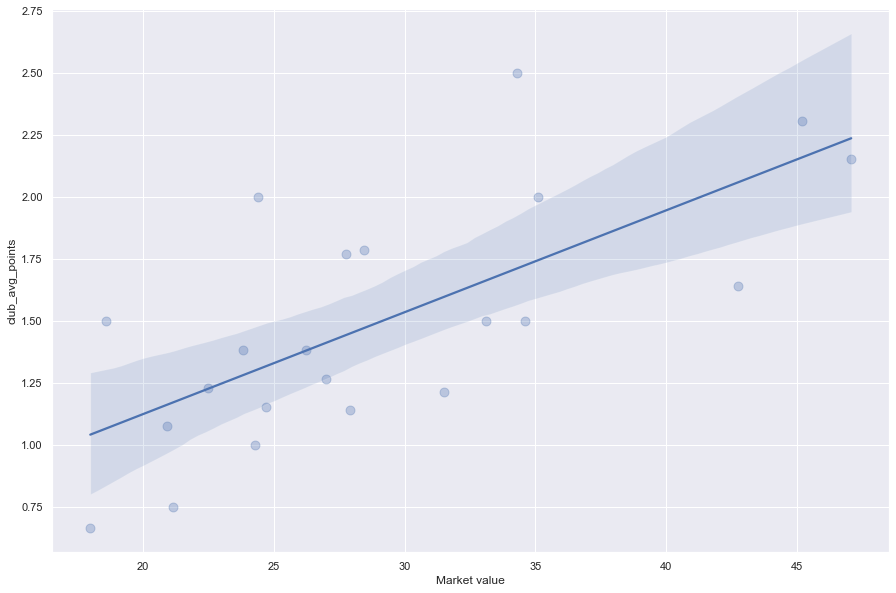

In [43]:
# Set the style of the graph
sns.set_theme(color_codes=True)

# set the size of the graph
fig, ax = plt.subplots(figsize=(15, 10)) 

#Trying to figure out whether the market value correlates the player_points
sns.regplot(x='Market value', y='club_avg_points', data = df2, scatter_kws={'s':80, 'alpha': 0.3}) 

In [44]:
# Get the R squared value
df2['club_avg_points'].corr(df2['Market value'])

0.6934361237886586

We can conclude that the club_points and Market value have a good positive relationship. This means that the more high value players play in the club, the more points the club earns.

# Conclusion

We scraped data from three different resources.

We combined them.

We added new variables for analysis.

We did cleaning steps.

We did the analysis and, according to the figures and R squared values, we concluded that:

1) **The number of goals, the number of assists, and points players earn affect the transfer cost of a soccer player.**

2) **The Market value and age of players have a slight negative relationship. R squared value is close to zero, which can be considered no relationship. However, we can consider that players from Europe lose the market value with age whereas players from non-European countries become more expensive.**

3) **The more high-value players play in the club, the more points the club earns. That means players with a high market value influence the results of the match.**